In [65]:
import numpy as np
import sympy as sy
import math as m
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Problem 1
def riemann_sum_2D(f, xMin, xMax, yMin, yMax, N, method):
  delx =(xMax-xMin)/N
  dely =(yMax-yMin)/N
  sum = 0
  if method == "left":
    for i in range(N):
      for j in range(N):
        sum += f(i*delx + xMin,j*dely + yMin)*delx*dely
    return sum

  elif method == "right":
    for i in range(1,N+1):
      for j in range(1,N+1):
        sum += f(i*delx + xMin,j*dely + yMin)*delx*dely
    return sum

  elif method == "mid":
    for i in range(N):
      for j in range(N):
        sum += f(i*delx+delx/2 + xMin,j*dely+dely/2 + yMin)*delx*dely
    return sum    
  else:
    return -1


In [66]:
#Problem 2
#a)
print("#a)")
x,y = sy.symbols("x,y")
z = x*sy.sin(x*y)
f1 = sy.lambdify((x,y),z)

print("N=10; ", riemann_sum_2D(f1, xMin=0, xMax=np.pi, yMin=0, yMax=np.pi, N=10, method="mid"))
print("N=20; ", riemann_sum_2D(f1, xMin=0, xMax=np.pi, yMin=0, yMax=np.pi, N=20, method="mid"))

#b)
print("#b)")
x,y = sy.symbols("x,y")
z = y*y*sy.exp(-x-y)
f2 = sy.lambdify((x,y),z)

print("N=10; ", riemann_sum_2D(f2, xMin=0, xMax=1, yMin=0, yMax=1, N=10, method="mid"))
print("N=20; ", riemann_sum_2D(f2, xMin=0, xMax=1, yMin=0, yMax=1, N=20, method="mid"))

#c)
print("#c)")
x,y = sy.symbols("x,y")
z = x**3*y**2 + x*y
f3 = sy.lambdify((x,y),z)

print("N=10; ", riemann_sum_2D(f3, xMin=0, xMax=1, yMin=1, yMax=2, N=10, method="mid"))
print("N=20; ", riemann_sum_2D(f3, xMin=0, xMax=1, yMin=1, yMax=2, N=20, method="mid"))

#a)
N=10;  3.335619689249047
N=20;  3.2926027753992186
#b)
N=10;  0.1013816192996159
N=20;  0.10148555992657286
#c)
N=10;  1.3302093750000006
N=20;  1.3325521484375003


1.3325

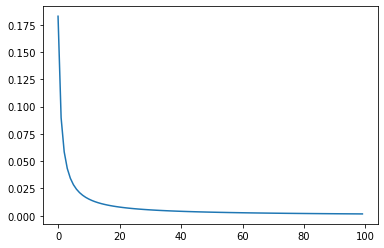

In [68]:
#Problem 3
x,y = sy.symbols("x,y")
z = x*sy.sin(x+y)
f = sy.lambdify((x,y),z)

trueValue = (6*np.sqrt(3)-6-np.pi)/12

err = []
for i in range(1,101):
  e = trueValue-riemann_sum_2D(f, xMin=0, xMax=np.pi/6, yMin=0, yMax=np.pi/3, N=i, method="right")
  err.append(abs(e))

plt.plot(np.arange(100),err)
plt.show()


In [70]:
#Problem 4
def riemann_sum_2D(f, xMin, xMax, yMin, yMax, zMin, zMax, N, method):
  delx =(xMax-xMin)/N
  dely =(yMax-yMin)/N
  delz =(zMax-zMin)/N
  sum = 0
  if method == "left":
    for i in range(N):
      for j in range(N):
        for k in range(N):
          sum += f(i*delx + xMin,j*dely + yMin,k*delz + zMin)*delx*dely*delz
    return sum

  elif method == "right":
    for i in range(1,N+1):
      for j in range(1,N+1):
        for k in range(1,N+1):
          sum += f(i*delx + xMin,j*dely + yMin,k*delz + zMin)*delx*dely*delz
    return sum

  elif method == "mid":
    for i in range(N):
      for j in range(N):
        for k in range(N):
          sum += f(i*delx+delx/2 + xMin,j*dely+dely/2 + yMin,k*delz + delz/2 + zMin)*delx*dely*delz
    return sum    
  else:
    return -1

In [71]:
#Problem 5
x,y,z = sy.symbols("x,y,z")
g = x*y + z**2
f = sy.lambdify((x,y,z),g)

print("N=10; ", riemann_sum_2D(f, xMin=0, xMax=1, yMin=0, yMax=2, zMin=0, zMax=3, N=10, method="mid"))
print("N=20; ", riemann_sum_2D(f, xMin=0, xMax=1, yMin=0, yMax=2, zMin=0, zMax=3, N=20, method="mid"))

N=10;  20.955
N=20;  20.98875000000004
